# Teoría de Filtrado Moderna: Funciones de aproximación
<img src="./logo_UTN.svg" align="right" top width="150" /> 

#### Por Mariano Llamedo Soria

### Resumen 

En este notebook se analizará la respuesta en frecuencia de las funciones aproximantes:

* Butterworth
* Chebyshev
* Bessel-Thompson

Estas funciones fueron estudiadas en clase, y mediante la función de análisis [analyze_sys]() se puede apreciar la respuesta en frecuencia (módulo, fase y retardo) y el diagrama de polos y ceros.

También se agregan las aproximaciones de **Cauer** o elíptica y la **Chebyshev-2** o inversa, ya que están implementadas en el **scipy.signal**.

Para cada aproximación, se podrá comparar cada uno de sus parámetros:

* orden del polinomio
* atenuación en la banda de detenida
* *ripple* o distorsión de amplitud en la banda de paso

de forma didáctica. Para ello también se usan otras funciones de apoyo como 

* [tf2sos_analog]() 
* [pretty_print_SOS]()


En el siguiente documento se presenta una comparativa de las funciones de aproximación estudiadas en Teoría de Filtrado Moderna, para la asignatura Teoría de Circuitos 2:

* Butterworth
* Chebyshev
* Bessel
* Cauer

El script permite parametrizar diferentes aspectos de la función de aproximación, como el ripple en la banda de paso, la atenuación en la banda de detenida y el orden. Como resultado se visualiza:

* Respuesta de módulo, fase y retardo de grupo
* Diagrama de polos y ceros

Se comienza con la importación de módulos externos

In [1]:
# Inicialización e importación de módulos

# Módulos externos
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

fig_sz_x = 10
fig_sz_y = 9
fig_dpi = 150 # dpi

#fig_font_size = 12

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
#plt.rcParams.update({'font.size':fig_font_size})


In [2]:
# Ahora importamos las funciones de PyTC2

from pytc2.sistemas_lineales import analyze_sys, pretty_print_bicuad_omegayq, tf2sos_analog, pretty_print_SOS

from pytc2.general import print_subtitle


Se define la siguiente función para facilitar y sistematizar el análisis de cada transferencia. La utilizaremos más adelante.

In [3]:

def sim_aprox(aproxs, orders2analyze, ripple, attenuation):

    all_sys = []
    filter_names = []

    for (this_aprox, this_order, this_ripple, this_att) in zip(aproxs, orders2analyze, ripple, attenuation):

        if this_aprox == 'Butterworth':

            z,p,k = sig.buttap(this_order)

            eps = np.sqrt( 10**(this_ripple/10) - 1 )
            num, den = sig.zpk2tf(z,p,k)
            num, den = sig.lp2lp(num, den, eps**(-1/this_order))

            z,p,k = sig.tf2zpk(num, den)

        elif this_aprox == 'Chebyshev1':

            z,p,k = sig.cheb1ap(this_order, this_ripple)

        elif this_aprox == 'Chebyshev2':

            z,p,k = sig.cheb2ap(this_order, this_ripple)

        elif this_aprox == 'Bessel':

            z,p,k = sig.besselap(this_order, norm='delay')

        elif this_aprox == 'Cauer':

            z,p,k = sig.ellipap(this_order, this_ripple, this_att)


        num, den = sig.zpk2tf(z,p,k)

        
        all_sys.append(sig.TransferFunction(num,den))

        this_label = this_aprox + '_ord_' + str(this_order) + '_rip_' + str(this_ripple)+ '_att_' + str(this_att)
        
        print_subtitle(this_label)
        # factorizamos en SOS's
        this_sos = tf2sos_analog(num, den)
        
        pretty_print_SOS(this_sos, mode='omegayq')
        
        filter_names.append(this_label)
        

    analyze_sys( all_sys, filter_names )


## Comparativa de órdenes


Este pequeño ejemplo permite comparar diferentes órdenes de la función de aproximación Butterworth. Quien lea este documento y se interese, puede probar todas las funciones aproximantes, órdenes, *ripple* y atenuaciones de la banda de detenida.


#### Butterworth_ord_2_rip_3_att_40

<IPython.core.display.Math object>

#### Butterworth_ord_3_rip_3_att_40

<IPython.core.display.Math object>

#### Butterworth_ord_4_rip_3_att_40

<IPython.core.display.Math object>

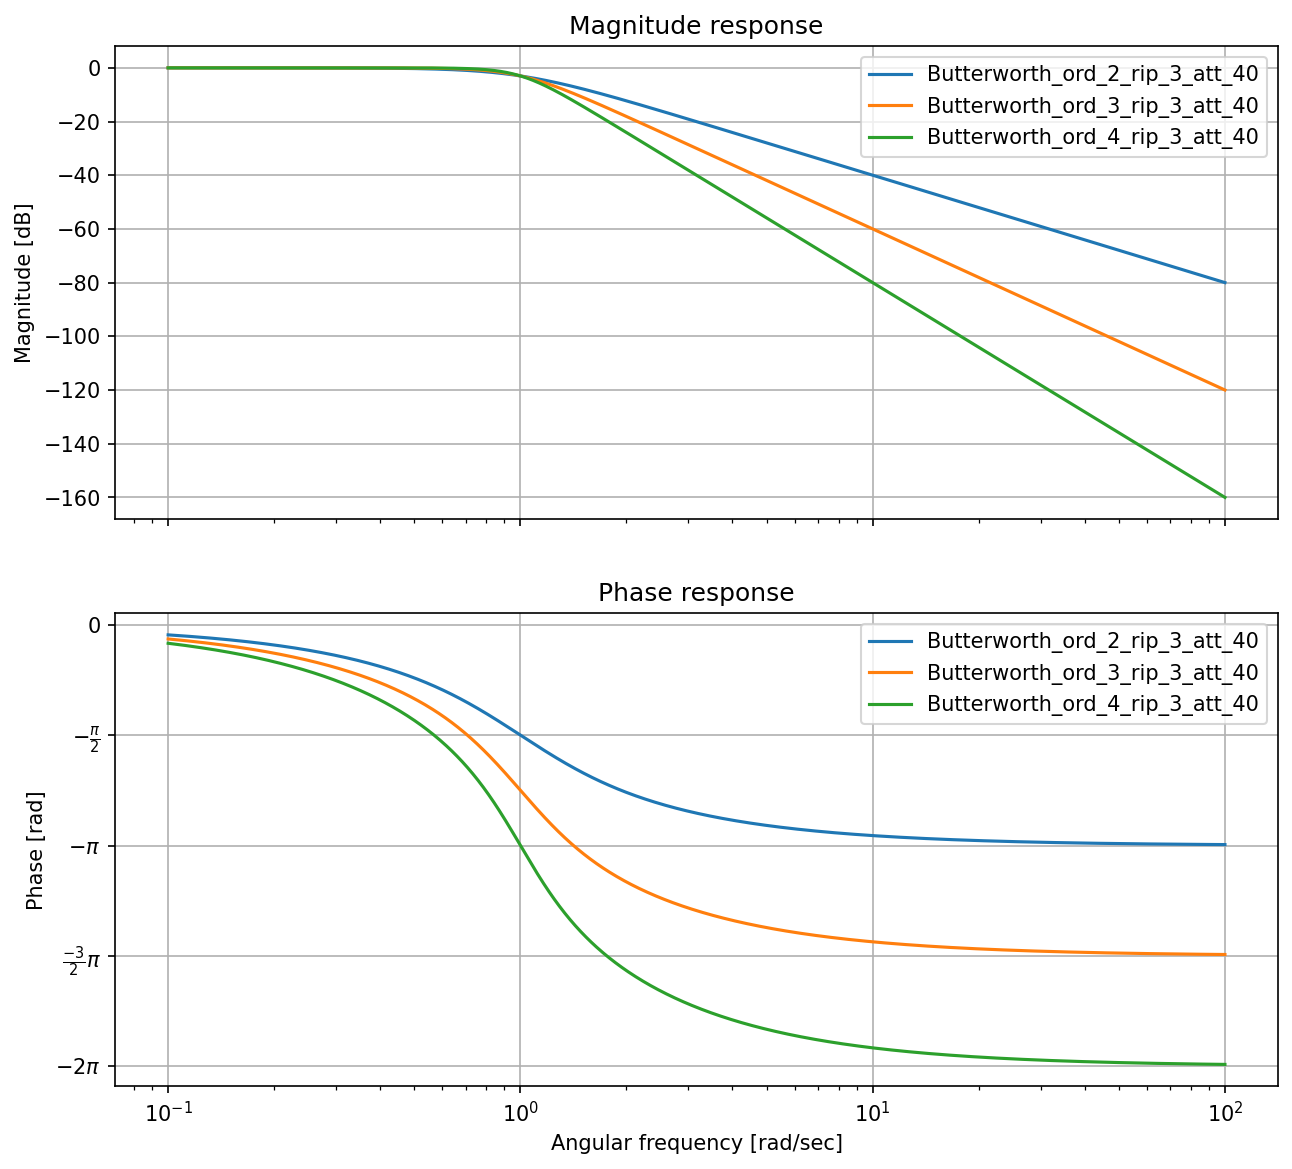

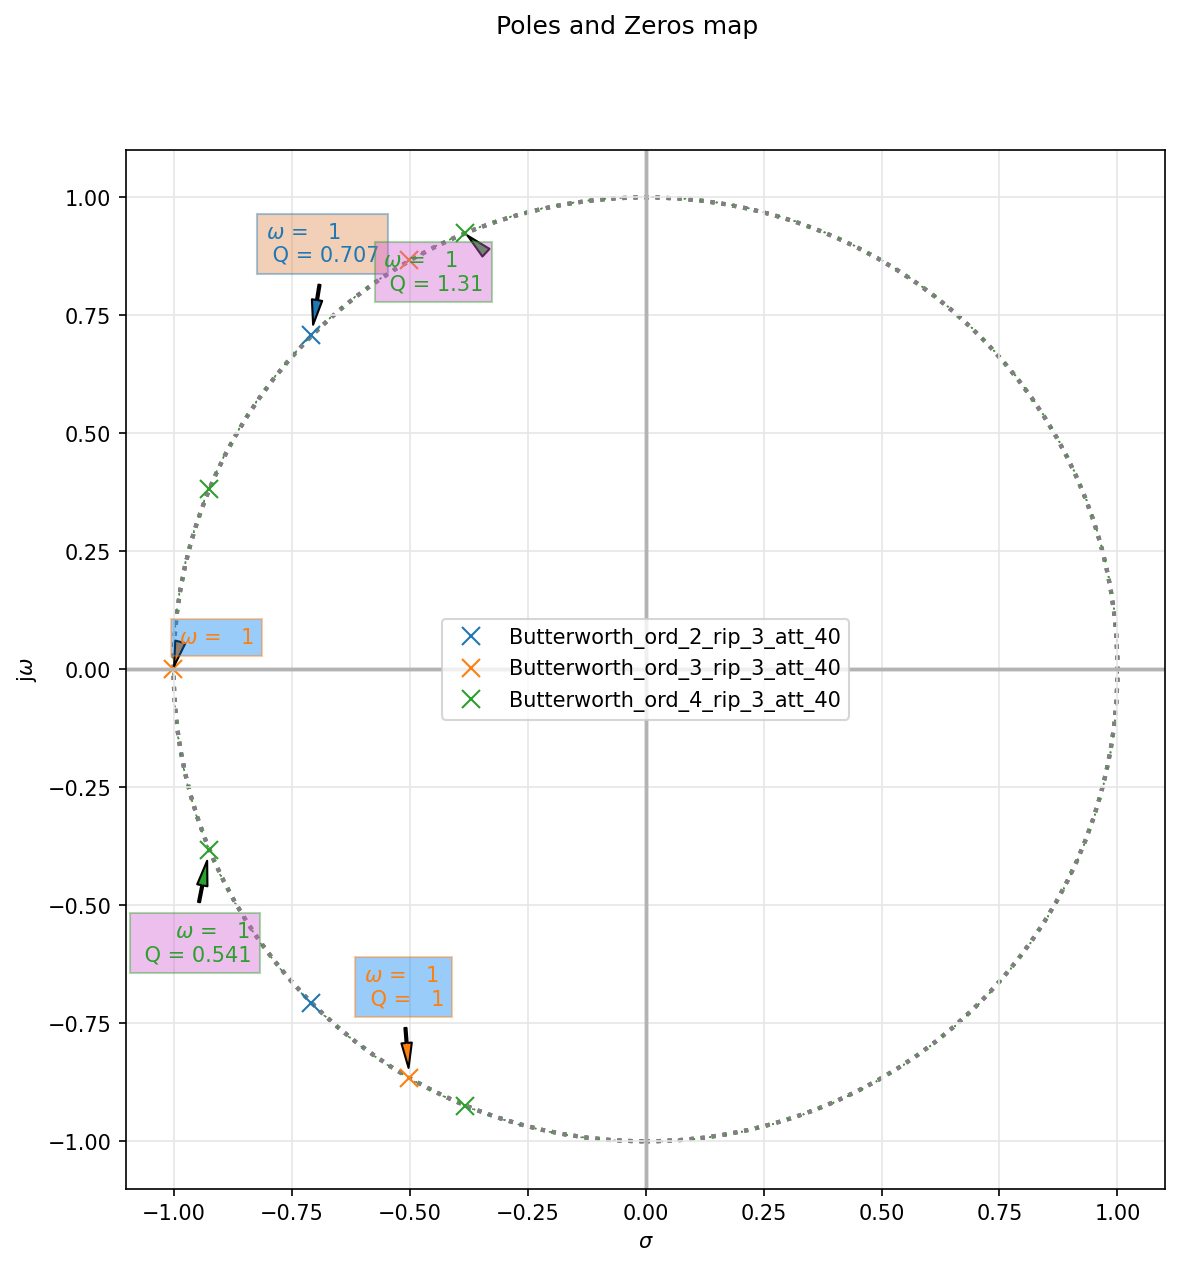

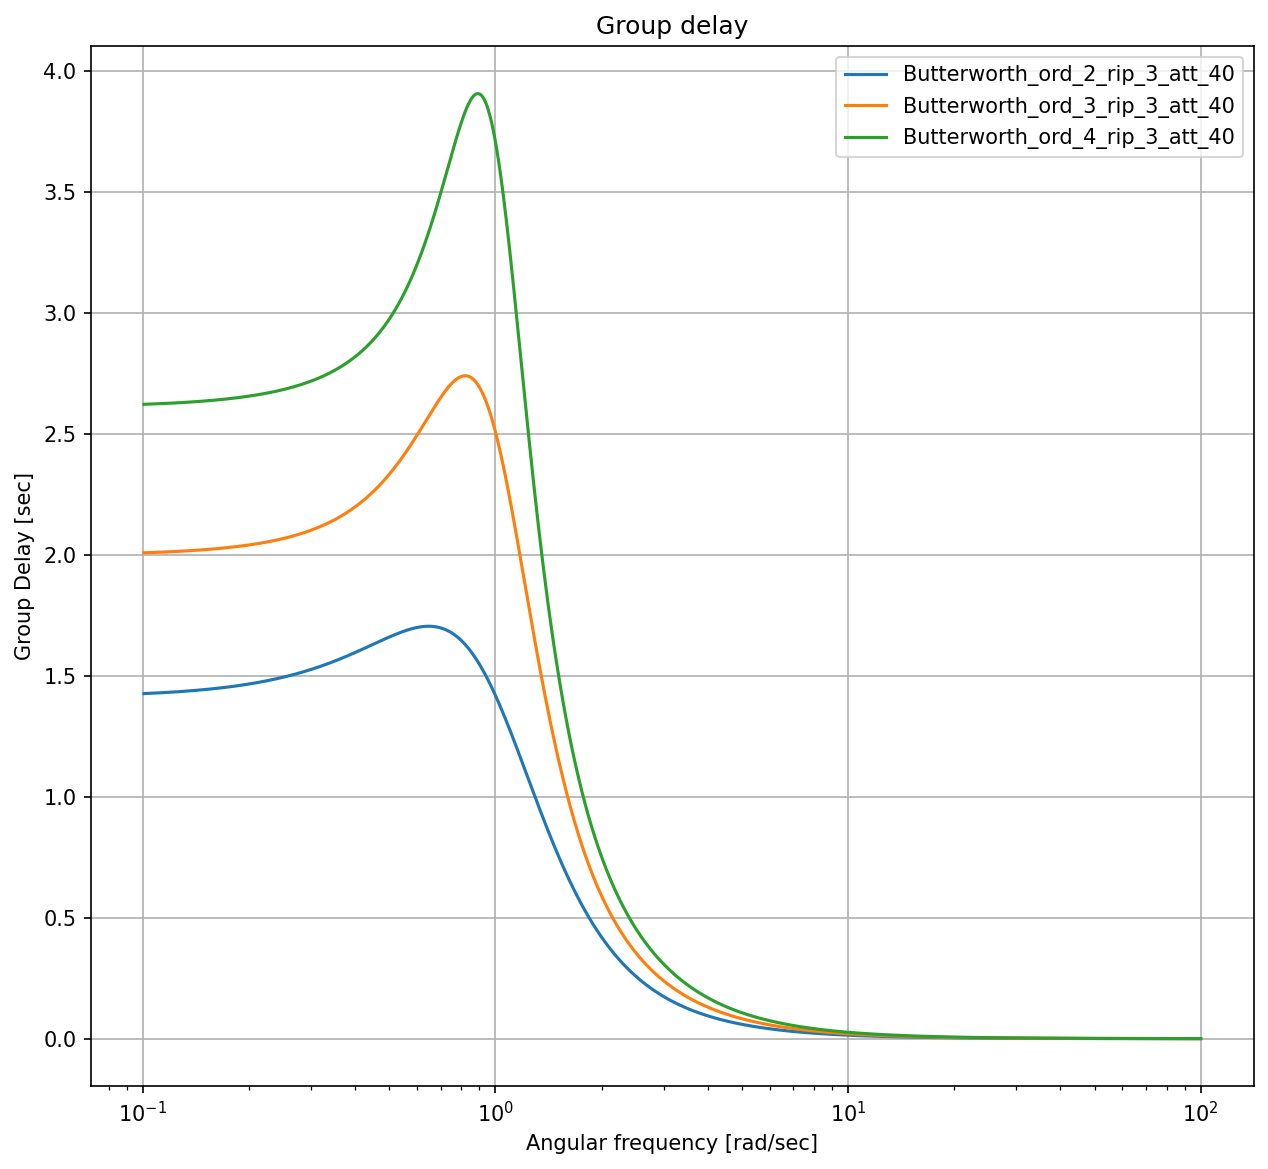

In [4]:
        
aprox_name = 'Butterworth'
#aprox_name = 'Chebyshev1'
#aprox_name = 'Chebyshev2'
#aprox_name = 'Bessel'
#aprox_name = 'Cauer'

# parametrizamos el orden para cada aproximación
orders2analyze = [2, 3, 4]

# Mismo requerimiento de ripple y atenuación
aproxs = [aprox_name] * len(orders2analyze)
ripple = [3] * len(orders2analyze) # dB \alpha_{max} <-- Sin parametrizar, lo dejo en Butterworth
attenuation = [40] * len(orders2analyze) # dB \alpha_{min} <-- Sin parametrizar, att fija


sim_aprox(aproxs, orders2analyze, ripple, attenuation)


## Comparativa de funciones de aproximación


Con este otro ejemplo se comparan las funciones de aproximación, para los mismos parámetros o requerimientos de plantilla.


#### Chebyshev1_ord_4_rip_3_att_40

<IPython.core.display.Math object>

#### Chebyshev2_ord_4_rip_3_att_40

<IPython.core.display.Math object>

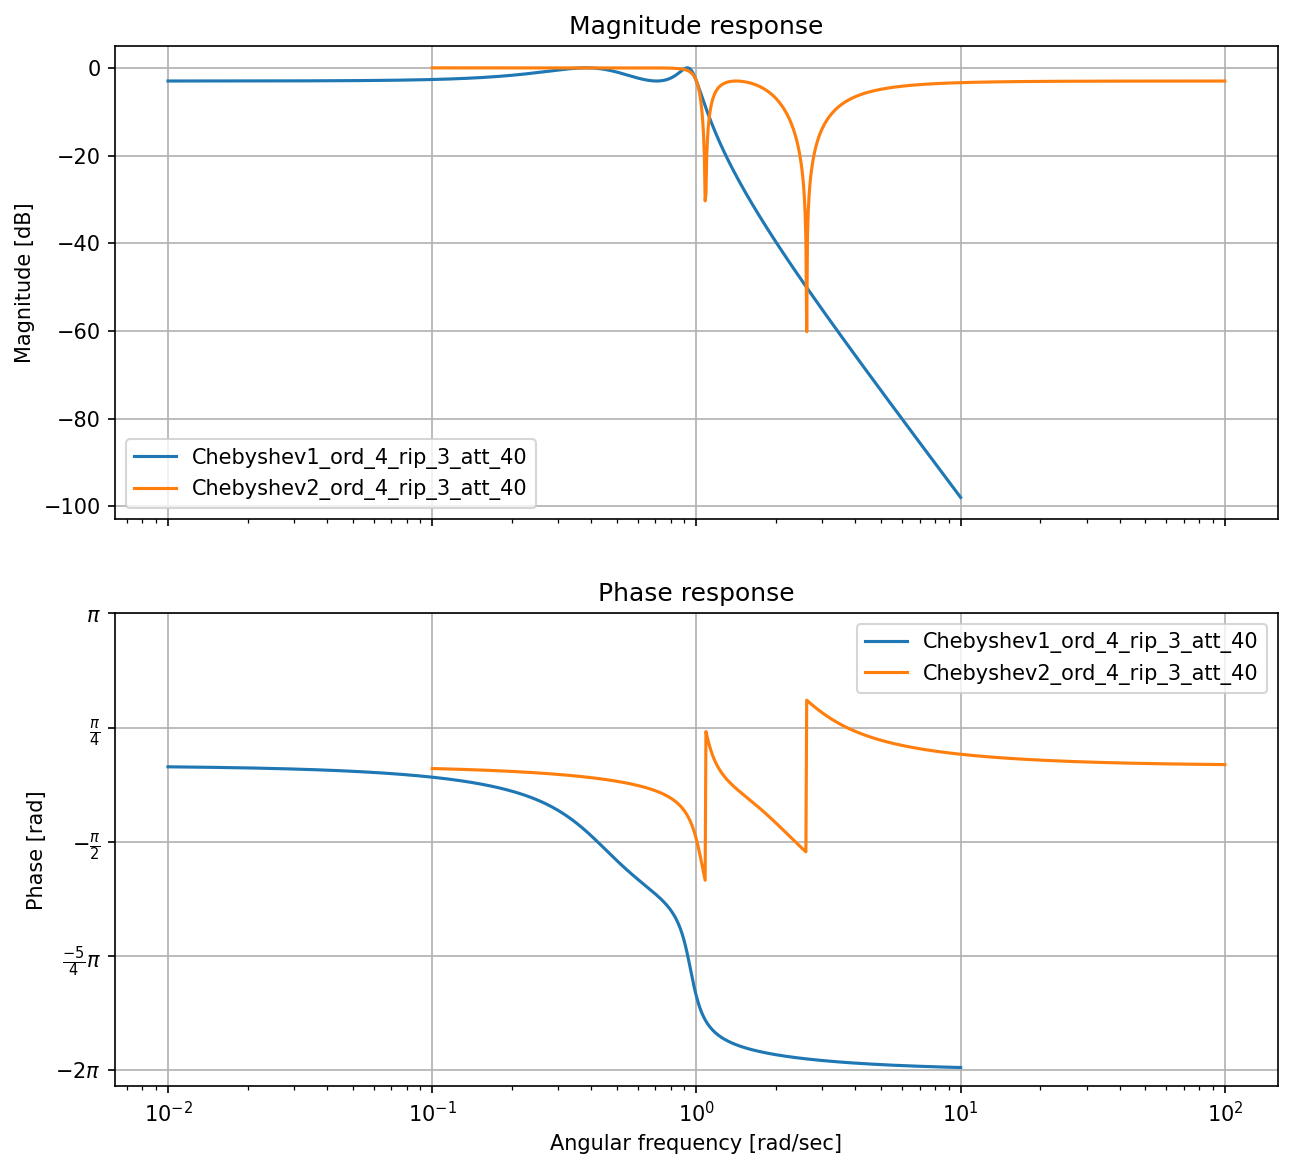

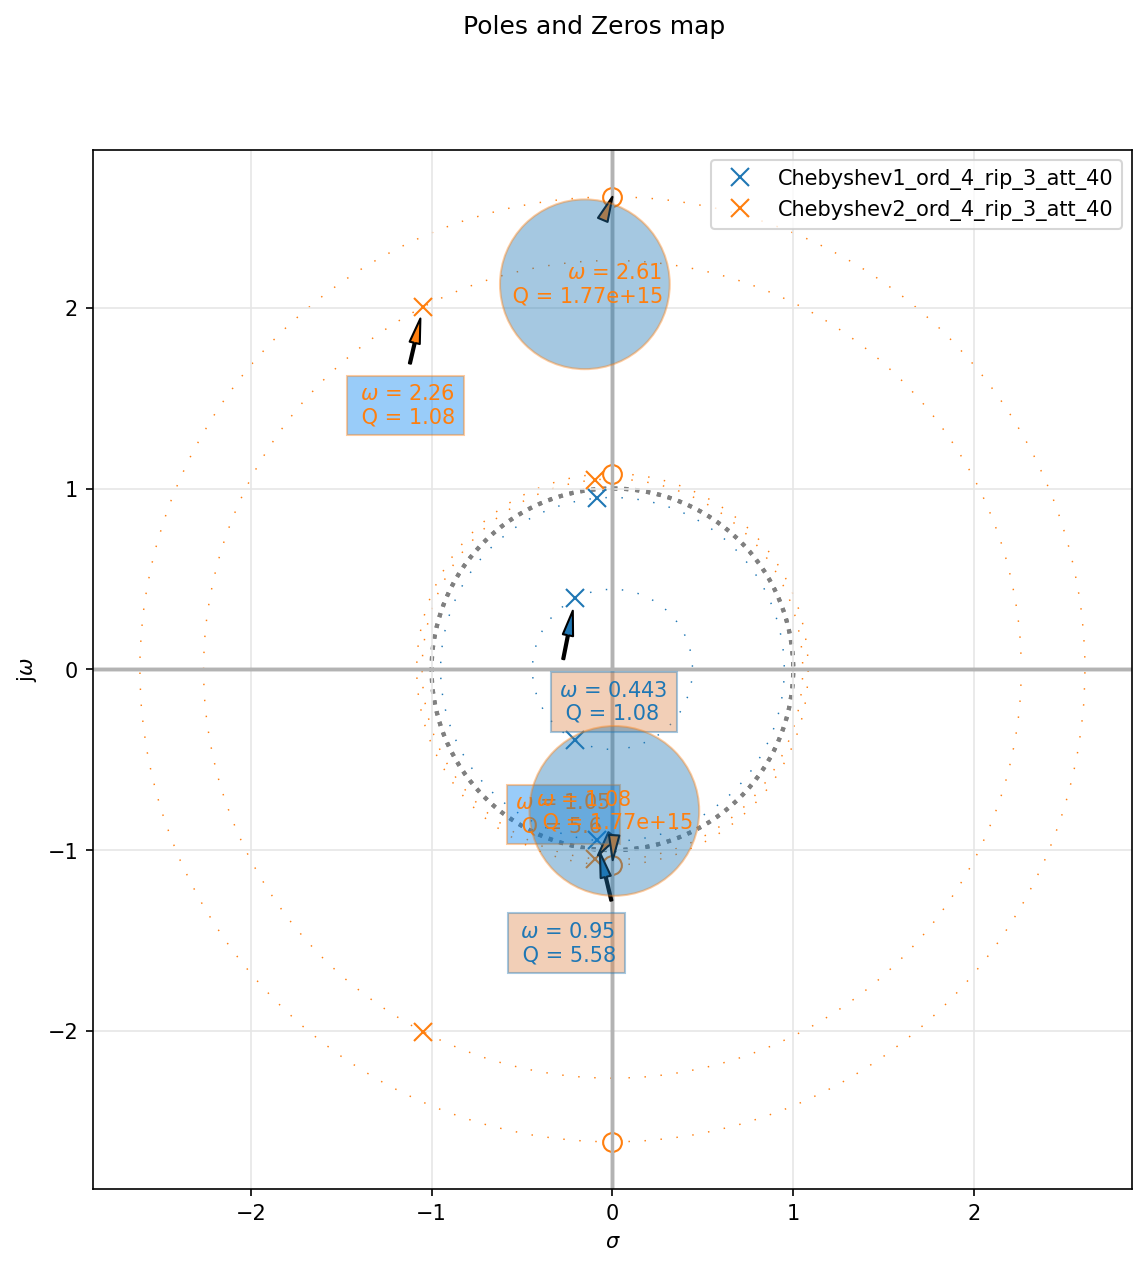

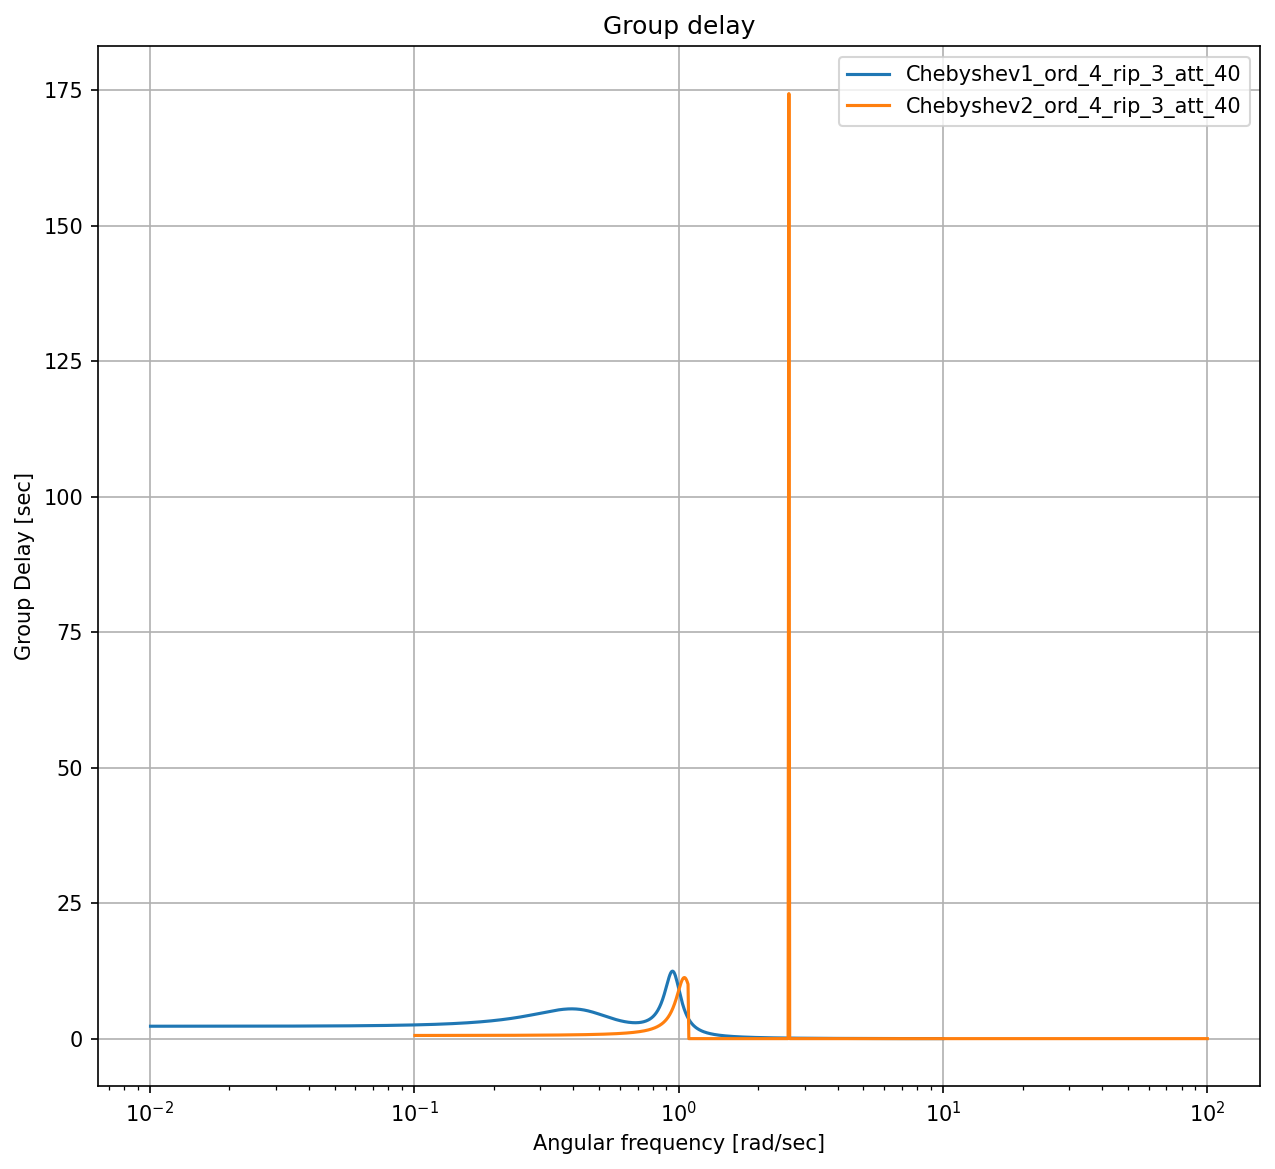

In [5]:

# comparamos las aproximaciones disponibles en scipy
aproxs = ['Chebyshev1', 'Chebyshev2']
#aproxs = ['Butterworth', 'Chebyshev1', 'Cauer']
#aproxs = ['Butterworth', 'Chebyshev1', 'Bessel']


# Mismo requerimiento de orden, ripple y atenuación
orders2analyze = [4] * len(aproxs)
ripple = [3] * len(aproxs) # dB \alpha_{max} <-- Sin parametrizar, lo dejo en Butterworth
attenuation = [40] * len(aproxs) # dB \alpha_{min} <-- Sin parametrizar, att fija

sim_aprox(aproxs, orders2analyze, ripple, attenuation)
